In [ ]:
# Encapsulation:-
    
# This is the concept of wrapping data and methods that work with data in one unit. 
# This prevents data modification by limiting access to variables and methods.
# An object's method can change a variable's value to prevent accidental changes.


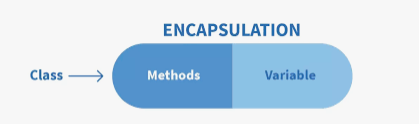

In [1]:
class Person:
    def __init__(self, name, age, gender):
        self.name = name           # public attribute
        self._age = age            # protected attribute
        self.__gender = gender     # private attribute

p = Person("John", 25, "male")

print(p.name)        
print(p._age)        
print(p.__gender)    


John
25


AttributeError: 'Person' object has no attribute '__gender'

In [2]:
class Person:
    def __init__(self, name, age, gender):
        self.name = name           # public attribute
        self._age = age            # protected attribute
        self.__gender = gender     # private attribute

    def get_gender(self):
        return self.__gender

    def set_gender(self, gender):
        self.__gender = gender

p = Person("John", 25, "male")

print(p.name)           # accessing public attribute - no error
print(p._age)           # accessing protected attribute - no error
# print(p.__gender)     # error - 'Person' object has no attribute '__gender' -  as it is a private attribute

print(p.get_gender())   # accessing private attribute using getter method - no error
p.set_gender("female")  # setting the value of private attribute using setter method
print(p.get_gender())   # accessing the updated value of private attribute using getter method


John
25
male
female


In [2]:
# private attribute __gender can only be accessed and modified through the getter and setter methods.
# When you call the setter method set_gender() with a new value,
# it updates the private attribute __gender safely, and when you call the getter method get_gender(), 
# it retrieves the updated value of the private attribute.

In [1]:
class BankAccount:
    def __init__(self, account_number, balance):
        self.__account_number = account_number  # Private attribute
        self.__balance = balance                # Private attribute

    def get_balance(self):
        return self.__balance

    def set_balance(self, balance):
        self.__balance = balance

  
account1 = BankAccount("1234567890", 1000.0)

# Get the current balance
balance = account1.get_balance()
print("Current balance:", balance)

# Update the balance
account1.set_balance(1500.0)
print("New balance:", account1.get_balance())


Current balance: 1000.0
New balance: 1500.0


In [7]:
class BankAccount:
    def __init__(self, account_number, balance):
        self._account_number = account_number  # Protected attribute
        self._balance = balance                # Protected attribute

    def deposit(self, amount):
        self._balance += amount

    def withdraw(self, amount):
        if amount <= self._balance:
            self._balance -= amount
        else:
            print("Insufficient funds.")

    def _show_balance(self):  # Protected method
        return self._balance

class BankCustomer:
    def __init__(self, name):
        self._name = name

    def display_balance(self, account):
        balance = account._show_balance()  # Accessing protected method
        print(f"Balance for {self._name}: {balance}")


account1 = BankAccount("12345", 1000)
customer1 = BankCustomer("Alice")

customer1.display_balance(account1)  # Accessing protected data through a method


Balance for Alice: 1000


In [ ]:
# # PRIVATE v/s PROTECTED ATTRIBUTES

# Protected Attributes:

# Conventionally indicated by a single leading underscore _ (e.g., _variable).
# Intended to be accessed and modified only within the class and its subclasses (inheritors).
# Not strictly enforced by the language; they can still be accessed from outside the class, 
# but it's a signal that these attributes are intended for internal use.
# Provides a way to give a hint to other developers that a particular attribute or method is part of the internal implementation 
# and should not be used directly.



# Private Attributes:

# Indicated by a double leading underscore __ (e.g., __variable).
# Intended to be accessed and modified only within the class.
# Name mangling is applied to private attributes, which changes the attribute name in a way that makes it harder to accidentally override in subclasses. 
# The transformation involves adding _classname as a prefix (e.g., __variable becomes _classname__variable).
# Offers more strict encapsulation than protected attributes, as the name mangling makes it less likely 
# to be accidentally accessed in derived classes or externally.



# +---------------------+-----------------------+-----------------------+
# |      Aspect         |  Protected Attributes |   Private Attributes  |
# +---------------------+-----------------------+-----------------------+
# | Naming Convention   | _variable             | __variable            |

# | Access within Class | Allowed               | Allowed               |

# | Access in Subclasses| Allowed               | Not allowed without   |
# |                     |                       | name mangling         |

# | Access Outside Class| Allowed               | Not allowed           |

# | Name Mangling       | No name mangling      | Name mangling applied |

# +---------------------+-----------------------+-----------------------+


In [8]:
# Protected Attributes

class Person:
    def __init__(self, name, age):
        self._name = name  # Protected attribute
        self._age = age    # Protected attribute

    def display(self):
        print(f"Name: {self._name}, Age: {self._age}")


p = Person("Alice", 30)
print(p._name)  # Accessing protected attribute (not recommended, but possible)


Alice


In [13]:
# Private Attributes

class Employee:
    def __init__(self, name, salary):
        self.__name = name      # Private attribute
        self.__salary = salary  # Private attribute

    def display(self):
        print(f"Name: {self.__name}, Salary: {self.__salary}")


e = Employee("Bob", 50000)
print(e._Employee__name)  # Accessing private attribute using name mangling (not recommended, but possible)


Bob


In [14]:
# Name mangling

class MyClass:
    def __init__(self):
        self.__private_var = 42

    def display(self):
        print(self.__private_var)


obj = MyClass()
# print(obj.__private_var)  # This will result in an AttributeError
print(obj._MyClass__private_var)  # Access using name mangling


42


In [15]:
# Property method

class Circle:
    def __init__(self, radius):
        self._radius = radius

    @property
    def radius_1(self):
        return self._radius

    @radius_1.setter
    def radius_1(self, value):
        if value >= 0:
            self._radius = value
        else:
            raise ValueError("Radius cannot be negative.")


c = Circle(5)
print(c.radius_1)  # Using the getter method
c.radius_1 = 7     # Using the setter method

# note that both the function have same name

# By using property methods, you can encapsulate the internal details of attribute access and modification. 
# This allows you to add validation, computation, or other behavior when getting or setting attributes.

5


In [12]:
# example 1

class VirtualWallet:
    def __init__(self):
        self._balance = 0  # Encapsulated attribute, not directly accessible

    def deposit(self, amount):
        if amount > 0:
            self._balance += amount
            print(f"Deposited ${amount} into the wallet.")

    def _deduct(self, amount):  # Encapsulated method, meant for internal use
        if amount > 0 and amount <= self._balance:
            self._balance -= amount
            print(f"Deducted ${amount} from the wallet.")

    def make_payment(self, amount):
        if amount > 0 and amount <= self._balance:
            self._deduct(amount)  # Using the encapsulated method
            print(f"Payment of ${amount} made successfully.")
        else:
            print("Insufficient funds for payment.")

    def get_balance(self):
        return self._balance


# Using the VirtualWallet class
wallet = VirtualWallet()

wallet.deposit(100)
wallet.make_payment(30)

print("Current balance:", wallet.get_balance())


Deposited $100 into the wallet.
Deducted $30 from the wallet.
Payment of $30 made successfully.
Current balance: 70


In [16]:
# example 2
# SimpleShopApp: An Example of Encapsulation in Python

class Product:
    def __init__(self, name, price):
        self._name = name  # Protected attribute
        self._price = price  # Protected attribute

    def get_info(self):
        return f"{self._name} - ₹{self._price:.2f}" # :.2f is used to specify two digits after decimal


class ShoppingCart:
    def __init__(self):
        self._items = []  # Protected attribute to store items

    def add_item(self, product):
        self._items.append(product)  # Adding product to cart

    def calculate_total(self):
        total = sum(product._price for product in self._items)  # Using protected attribute
        return total


class Customer:
    def __init__(self, name):
        self._name = name  # Protected attribute
        self._cart = ShoppingCart()  # Composition: A customer has a shopping cart

    def add_to_cart(self, product):
        self._cart.add_item(product)  # Adding product to cart

    def checkout(self):
        total = self._cart.calculate_total()  # Calculating total using cart's method
        return f"{self._name}, your total is ${total:.2f}"


# Creating products
product1 = Product("Laptop", 899.99)
product2 = Product("Phone", 599.99)
product3 = Product("Headphones", 89.99)

# Creating a customer
customer = Customer("Alice")

# Adding products to the cart
customer.add_to_cart(product1)
customer.add_to_cart(product2)
customer.add_to_cart(product3)

# Checking out
checkout_result = customer.checkout()
print(checkout_result)


Alice, your total is $1589.97


In [ ]:
# example 3

class Book:
    def __init__(self, title, author, isbn):
        self._title = title
        self._author = author
        self._isbn = isbn
        self._available = True

    def get_info(self):
        return f"Title: {self._title}\nAuthor: {self._author}\nISBN: {self._isbn}"

    def checkout(self):
        if self._available:
            self._available = False
            return "Book checked out successfully."
        else:
            return "Book is already checked out."

    def checkin(self):
        if not self._available:
            self._available = True
            return "Book checked in successfully."
        else:
            return "Book is already checked in."


class Library:
    def __init__(self, name):
        self._name = name
        self._books = []

    def add_book(self, book):
        self._books.append(book)

    def display_books(self):
        return "\n".join([book.get_info() for book in self._books])

    def search_book(self, title):
        for book in self._books:
            if book._title.lower() == title.lower():  # Using protected attribute
                return book.get_info()
        return "Book not found."


# Creating books
book1 = Book("The Great Gatsby", "F. Scott Fitzgerald", "978-3-16-148410-0")
book2 = Book("To Kill a Mockingbird", "Harper Lee", "978-0-06-112008-4")
book3 = Book("1984", "George Orwell", "978-0-45-152493-5")

# Creating a library
library = Library("City Public Library")

# Adding books to the library
library.add_book(book1)
library.add_book(book2)
library.add_book(book3)

# Displaying and searching for books
print("Available Books:\n", library.display_books())
search_title = "To Kill a Mockingbird"
print("\nSearching for", search_title)
print(library.search_book(search_title))


# Practice

In [ ]:
# Encapsulation is a mechanism that binds code and data that it manipulates.

# It is the protective shield that prevents the data from being accessed by the code outside the shield 
# and in this the variable or the data of the class is hidden from any other class 
# and can be accessed through any member function of the own class in which that they are declared.

# Through encapsulation the methods and the variables of a class are very well hidden and safe.

# we can relate encapsulation to vending machine.

In [ ]:
# Benifits of encapsulation

# 1. Data Hiding :user will have no idea about the inner implementation of the class.
                # user will also not be aware of how the class is storing values in the variables.
                # user can only see passing the value to a method and the variables are getting initialized with that value.

# 2. Increased Flexibility : we make the variables of the class according to how we want them to use. 
                        # in case we want it to be read-only method or can be write-only depending on what we require.

# 3. Reusability : It becomes easy to change with new requirements.

In [ ]:
# How encapsulation works in Python

# In Python plain attributes are used in order to achieve encapsulation
# this can also be done with the help of naming conventions through which we are able to distinguish between protected and private members.

# we can use double underscore in front of the variable and function name.
# it can hide them when accessing them from out of the class or out of the scope of the class.

# example : __name, __methods()
# python does not have any real private methods 
# but we can use this double underscore naming convention by which we can make them private methods(sort of)


In [8]:
class Edureka():
    def __init__(self):
        self.course = "Python programming course"
        self.tech = "Python"
    def CourseName(self):
        return self.course + " " + self.tech

ob = Edureka()

print(ob.course)
print(ob.tech)
print(ob.CourseName())
 

Python programming course
Python
Python programming course Python


In [9]:
class Edureka():
    def __init__(self):
        self.course = "Python programming course"
        self.__tech = "Python"
    def CourseName(self):
        return self.course + " " + self.__tech

ob = Edureka()

print(ob.course)
# print(ob.__tech) # error
# print(ob.CourseName())   # error

Python programming course


In [ ]:
# Name Mangling

# This is a technique by which we will be able to access this private variable that we have made.
# So in python mangling is used for private class members which are designed in such a way that 
# we just give them a name with two underscores and no more one trailing underscores.

In [10]:
# using name mangling
class Edureka():
    def __init__(self):
        self.course = "Python programming course"
        self.__tech = "Python"
    def CourseName(self):
        return self.course + " " + self.__tech

ob = Edureka()

print(ob.course)
print(ob._Edureka__tech) # name mangling
print(ob.CourseName())   

Python programming course
Python
Python programming course Python


In [11]:
# using getter 

class Edureka():
    def __init__(self):
        self.course = "Python programming course"
        self.__tech = "Python"
    def CourseName(self):
        return self.course + " " + self.__tech
    
    def get__tech(self):
        return self.__tech
    
    def set__tech(self, t):
        self.__tech = t

ob = Edureka()
ob.set__tech("machine learning")  # setter method
print(ob.get__tech(), "----using getter method")
print(ob.course,"----class variable")
print(ob._Edureka__tech, "----using name mangling") 
print(ob.CourseName())   

machine learning ----using getter method
Python programming course ----class variable
machine learning ----using name mangling
Python programming course machine learning


In [12]:
class Edureka():
    def __init__(self):
        self.course = "Python programming course"
        self.__tech = "Python"
    def CourseName(self):
        return self.course + " " + self.__tech
    
    def set__tech(self,x):
        self.__tech = x

    def get__tech(self):
        return self.__tech

ob = Edureka()
ob.set__tech("machine learning")
print(ob.get__tech())  

machine learning
